In [3]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [22]:
stats = pd.read_excel('Corpus.xlsx',header=0)

In [27]:
stats.columns=["question","tag"]

In [28]:
stats

,question,tag
0,basics of unsupervised learning,0
1,learn unsupervised leering,0
2,What is the principle of Unsupervised learnings?,0
3,what is unsupervised learnings,0
4,What is use of unsupervised learning techniques,0
...,...,...
79,how are cluster graphical representation,2
80,Euclidian distance formula,10
81,how to cluster in data looks like,2
82,different type of agglomerative clustering,9


In [29]:
stats=stats.dropna(subset=["question"])

In [25]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
stats["Sub_Topic_Code"] = labelEncoder.fit_transform(stats["Sub_Topic_Code"])

In [27]:
stats.Sub_Topic_Code.value_counts()

19    135
10    105
22     70
12     15
26     13
13     10
6       9
2       8
16      6
24      5
11      5
3       4
5       4
1       3
7       3
0       3
17      3
20      3
15      2
8       2
18      2
4       2
21      2
23      2
25      2
27      2
14      1
9       1
Name: Sub_Topic_Code, dtype: int64

In [50]:
stats1=stats.sample(frac=1)

In [51]:
y=stats1["tag"]
X=stats1["question"]

In [52]:
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)

In [31]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()

In [33]:
# use default options for CountVectorizer
#vect = CountVectorizer()
vect = CountVectorizer(lowercase=False)

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print (metrics.accuracy_score(y_test, y_pred_class))
print(nb.score(X_test_dtm,y_test))

0.34615384615384615
0.34615384615384615


In [34]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print ('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print("Training Accuracy")
    print(nb.score(X_train_dtm,y_train))
    print("Testing Accuracy")
    print(nb.score(X_test_dtm,y_test))
    print(classification_report(y_pred_class,y_test))
    print(confusion_matrix(y_pred_class,y_test))

In [37]:
vect = CountVectorizer(ngram_range=(1, 3))
tokenize_test(vect)

Features:  281
Training Accuracy
0.9482758620689655
Testing Accuracy
0.34615384615384615
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           5       1.00      0.40      0.57         5
           6       0.00      0.00      0.00         0
           7       0.22      0.67      0.33         3
           8       0.80      0.40      0.53        10
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         0

    accuracy                           0.35        26
   macro avg       0.30      0.25      0.24        26
weighted avg       0.56      0.35      0.39        26

[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 2 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

In [118]:
nb = MultinomialNB()
nb.fit(text, y_train)
y_pred_class = nb.predict(X_test_dtm)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [193]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(X_train) # (documents, vocab)

In [194]:
pd.DataFrame(vectors_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.427375,...,0.0,0.427375,0.00000,0.459964,0.00000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.57735,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.450406,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.39374,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.00000,0.000000,0.00000,0.826926,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.589308,0.000000,...,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0


In [72]:
num_top_words=50
vocab = np.array(vect.get_feature_names())

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    print(len(vocab))
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [29]:
vocab.shape

(502,)

In [30]:
vocab

array(['2d', 'about', 'accepted', 'access', 'add', 'adding', 'advice',
       'aggregation', 'all', 'always', 'an', 'analysis', 'analytics',
       'and', 'animation', 'append', 'apply', 'are', 'argument',
       'arguments', 'arithmatic', 'array', 'arrays', 'as', 'assess',
       'astype', 'at', 'attribute', 'automatically', 'automation',
       'autoscale', 'available', 'average', 'ax', 'axis', 'bar', 'bars',
       'based', 'be', 'beginner', 'best', 'between', 'binned', 'black',
       'blocking', 'boolean', 'border', 'boxes', 'boxplot', 'boxplots',
       'but', 'by', 'calculate', 'can', 'cast', 'categorical', 'certain',
       'change', 'changes', 'changing', 'check', 'choice', 'chunks',
       'class', 'classess', 'classification', 'clearing', 'close', 'code',
       'coefficient', 'colorbar', 'column', 'columns', 'colums',
       'combinations', 'combine', 'come', 'comment', 'comments', 'common',
       'compare', 'comparing', 'composed', 'comprehensions',
       'concatenating'

In [99]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
vect = CountVectorizer(lowercase=False,stop_words='english')

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
u, s, v = randomized_svd(X_train_dtm, 5)

In [33]:
# computes an orthonormal matrix whose range approximates the range of A
# power_iteration_normalizer can be safe_sparse_dot (fast but unstable), LU (imbetween), or QR (slow but most accurate)
def randomized_range_finder(A, size, n_iter=5):
    Q = np.random.normal(size=(A.shape[1], size))
    
    for i in range(n_iter):
        Q, _ = linalg.lu(A @ Q, permute_l=True)
        Q, _ = linalg.lu(A.T @ Q, permute_l=True)
        
    Q, _ = linalg.qr(A @ Q, mode='economic')
    return Q

In [40]:
def randomized_svd(M, n_components, n_oversamples=10, n_iter=4):
    
    n_random = n_components + n_oversamples
    
    Q = randomized_range_finder(M, n_random, n_iter)
    
    # project M to the (k + p) dimensional space using the basis vectors
    B = Q.T @ M
    
    # compute the SVD on the thin matrix: (k + p) wide
    Uhat, s, V = linalg.svd(B, full_matrices=False)
    del B
    U = Q @ Uhat
    
    return U[:, :n_components], s[:n_components], V[:n_components, :]

In [37]:
s

array([14.68884665, 11.10867839,  8.92711309,  7.31747125,  6.97317157])

In [38]:
v

array([[ 0.00919635,  0.00488716,  0.00517299, ...,  0.00959408,
         0.00644992,  0.01390188],
       [-0.00238731, -0.00540548,  0.00341668, ...,  0.00514815,
        -0.00577673,  0.00690351],
       [-0.00931021,  0.00334692, -0.00180296, ...,  0.01309595,
        -0.00935358, -0.00816737],
       [-0.0168738 , -0.01073094, -0.01153442, ...,  0.01751257,
         0.01987772,  0.01540822],
       [-0.00928483,  0.01476527,  0.00535066, ...,  0.03154301,
        -0.01384809,  0.01199615]])

In [55]:
print (len(vect.get_feature_names()[:]))

523


In [100]:
show_topics(v)

453


['python lists different dictionaries list generate How data pandas random multiple numbers variable values single return merge expression distribution read code dataframe file create using functions dictionary programming filtering languages order element does number language What available types uniform normal nominal source features csv string xgboost convert plot star method',
 'python dictionaries variable merge expression numbers single distribution code does source xgboost star convert read nominal normal uniform used text plot analysis list types element language available method filtering continuous differentiate languages duplicate deleting regex advice beginner return nesting similarities functions programming double parameters set gaussian error global local validation',
 'pandas different python using dataframe generate data numbers programming What functions random variable languages particular distribution code best features read language available row csv way types does

In [69]:
U

NameError: name 'U' is not defined

In [70]:
clf = decomposition.NMF(n_components=5, random_state=1)

W1 = clf.fit_transform(X_train_dtm)
H1 = clf.components_

In [73]:
show_topics(H1)

453


['python dictionaries generate random numbers variable data multiple expression merge distribution single return code does uniform normal read nominal source xgboost convert star plot string method text analysis used features csv What using order dictionary number element types values filtering list boxplot keys function distributions sort continuous differentiate nesting beginner',
 'How dataframe create sample index mask use type boolean based objects Pandas cast matplotlib dataframes object change heatmap dictionary draw datatime multiindex correlation value tuples apply access randomly load save pickle format subset totals margins random datasets large loc ix iloc pivot border black In ax Python nan np astype',
 'lists list nested create apply new Python combine parts split sorting map Dataframe result store func subsets remove file filtering dictionaries write values numpy array combinations items location element tuple index contains exists check nestes arrays similar single mult

In [74]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, random_state=42)
data = svd.fit_transform(X_train) 

ValueError: could not convert string to float: 'How to create random large datasets?'

In [97]:
X_all=X[:] # as no need to split data here
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
tfidf = TfidfVectorizer()
X_all_tfidf=tfidf.fit_transform(X_all)
# X_test_tfidf=tfidf.transform(X_test)
tfidf_features=tfidf.get_feature_names()
indices=np.argsort(tfidf.idf_[::-1])
top_indices=indices[0:2000]
top_features=[tfidf_features[i] for i in indices[0:2000]]
# top_tfidf=[tfidf_features[i] for i in indices[0:2000]]
top_n=np.argsort(top_features[::-1])
k_values=np.arange(2,150,3)
indices[:9] #just printing for self reference

array([181, 368,  52, 377,  16, 352, 215, 239, 502], dtype=int64)

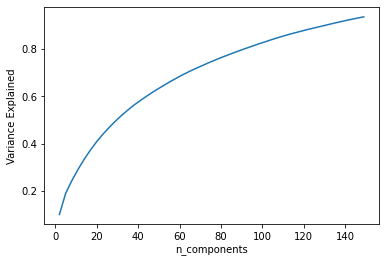

In [80]:
variance=[]
# X=sparse.csr_matrix(top_features)
for k in k_values:
    svd=TruncatedSVD(n_components=k)
    svd.fit_transform(X_train_dtm)

    score=svd.explained_variance_ratio_.sum()
    variance.append(score)
plt.plot(k_values, variance)
plt.xlabel('n_components')
plt.ylabel('Variance Explained')
plt.show()

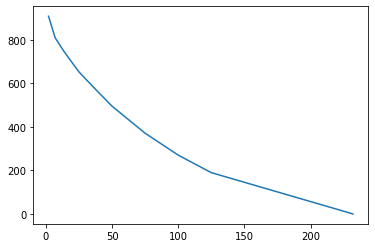

In [90]:
from sklearn.cluster import KMeans
errors=[]
k_value=[2,7, 13,  17, 25 , 30, 40, 50,75,100,125,232]
for i in k_value:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_train_dtm)
    
    errors.append(kmeans.inertia_)
plt.plot(k_value, errors)
plt.show()

In [114]:
    tsv = TruncatedSVD(n_components=100,algorithm='randomized')
    tfv = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1)
    tfv.fit(X_train)
    text = tfv.transform(X_train)
    text = tsv.fit_transform(text)

In [182]:
y_test

94     25
78     19
17      4
100    31
36     11
85     20
55     16
83     19
82     19
52     16
95     26
44     14
31      9
93     24
65     18
35     11
66     18
70     18
81     19
80     19
33     10
32      9
40     13
39     12
38     12
46     15
42     13
10      2
2       1
54     16
67     18
Name: Sub_Topic_Code, dtype: int32

In [110]:
score=tsv.explained_variance_ratio_.sum()

In [116]:
text

array([[ 2.43339501e-01, -3.98394085e-01, -2.82181198e-01, ...,
        -1.14859601e-02,  5.01032676e-02, -4.42118595e-02],
       [ 2.10712065e-01,  1.04619807e-01,  5.76471969e-02, ...,
         4.29601561e-02,  5.09146610e-02,  3.73138377e-02],
       [ 1.38194373e-01, -8.10962163e-02, -1.81066756e-02, ...,
         3.25561208e-02,  2.95119283e-02, -8.09157888e-03],
       ...,
       [ 3.84811011e-01,  1.71137879e-01,  3.51942695e-01, ...,
        -8.43967894e-03, -2.81831957e-04,  8.34312942e-05],
       [ 3.67919866e-01, -5.14334256e-01, -3.61199934e-01, ...,
         4.72939817e-02,  1.00824710e-02, -5.10182542e-02],
       [ 6.96842027e-02,  2.49602555e-02,  1.19097055e-01, ...,
        -1.09731416e-02, -2.20840849e-02,  1.69681348e-02]])

In [53]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
vectorizer = TfidfVectorizer(max_df=10, stop_words='english', use_idf=True)
#vectorizer = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1)
#lsa = NMF(n_components=200)
mnb = LogisticRegression()

train_text = vectorizer.fit_transform(X_train)
test_text = vectorizer.transform(X_test)
#train_text = lsa.fit_transform(train_text)
#test_text = lsa.fit_transform(test_text)
train_text = Normalizer(copy=False).fit_transform(train_text)
test_text = Normalizer(copy=False).transform(test_text)
mnb.fit(train_text, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred_class = mnb.predict(test_text)

In [55]:
    print("Training Accuracy")
    print(mnb.score(train_text,y_train))
    print("Testing Accuracy")
    print(mnb.score(test_text,y_test))
    print(classification_report(y_pred_class,y_test))
    print(confusion_matrix(y_pred_class,y_test))

Training Accuracy
0.8275862068965517
Testing Accuracy
0.6538461538461539
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         8
           8       1.00      0.45      0.62        11
           9       1.00      1.00      1.00         1

    accuracy                           0.65        26
   macro avg       0.50      0.44      0.44        26
weighted avg       0.94      0.65      0.74        26

[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0]
 [1 0 5 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 1]]


In [41]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=10, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [42]:
import eli5
eli5.show_weights(mnb, vec=vectorizer, top=20)

In [37]:
X['predicted_label'] = y_pred_class
misclassified_estatsamples = stats[(stats['tags']!=stats['predicted_label'])&(stats['tags']=='python')&(stats['predicted_label']=='java')]
eli5.show_prediction(clf, misclassified_estatsamples['post'].values[1], vec=vec)

KeyError: 'tags'

In [38]:
X

0                        How to Summarizes data (Data and Histogram)
1                                          What are Central Tendency
2                                                       What are 3Ms
3                                                       What is mean
4                                                     What is median
                                         ...                        
86                                                When to do Scaling
87                                            What are Normalization
88                                          When to do Normalization
89                 What are the pros and cons of Scaling and Norm...
predicted_label    [16, 19, 19, 16, 20, 19, 17, 19, 19, 19, 19, 1...
Name: Question, Length: 91, dtype: object